Theoritical questions
1. What is Boosting in Machine Learning?

  Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees with shallow depth) sequentially to form a strong learner.

  Each new model focuses on the errors (misclassified samples) of the previous ones.

  The idea: instead of building one complex model, we build many weak models and combine them for higher accuracy.

2. How does Boosting differ from Bagging?

  Bagging
  Models trained independently in parallel on bootstrapped datasets.
  Reduces bias (improves accuracy).
  Equal voting/averaging of all models.
  Random Forest.

  Boosting
  Models trained sequentially, each correcting the errors of the previous one.
  Reduces variance (handles overfitting).
  Weighted voting, more weight to better models.
  AdaBoost, Gradient Boosting, XGBoost, CatBoost.

3. What is the key idea behind AdaBoost?

  AdaBoost (Adaptive Boosting) improves performance by assigning higher weights to misclassified samples so that the next weak learner focuses more on the difficult cases.

4. Explain the working of AdaBoost with an example

  Steps:
  Start with equal weights for all training samples.
  Train a weak learner (say, a decision stump).
  Increase weights of misclassified samples, decrease weights of correctly classified ones.
  Train the next weak learner on this updated dataset.
  Repeat for multiple learners, then combine them using weighted majority voting.

  Example:
  Suppose we classify emails as spam/not spam.
  First weak model misclassifies “free money” email → its weight increases.
  Next model focuses more on this hard case.
  After several rounds, the ensemble correctly identifies spam with high accuracy.

5. What is Gradient Boosting, and how is it different from AdaBoost?

  Gradient Boosting: Instead of reweighting misclassified samples (like AdaBoost), it fits the next model on the residual errors of the previous model using gradient descent on a loss function.

  Difference:

  AdaBoost → updates weights of samples.

  Gradient Boosting → fits new learners on gradients (residuals).

6. What is the loss function in Gradient Boosting?

  It depends on the problem:

  Regression: Mean Squared Error (MSE), Mean Absolute Error (MAE).

  Classification: Log Loss (cross-entropy).

  Gradient Boosting minimizes this loss function by fitting learners on the negative gradient of the error.

7. How does XGBoost improve over traditional Gradient Boosting?

  XGBoost (Extreme Gradient Boosting) adds:

  Regularization (L1 and L2) → prevents overfitting.

  Parallelization → faster training.

  Sparsity awareness → handles missing data well.

  Tree pruning using depth-first approach.

  Efficient memory usage with out-of-core computation.

8. What is the difference between XGBoost and CatBoost?

  XGBoost
  Requires encoding (One-Hot, Label Encoding).
  Regularization + shrinkage.
  Needs preprocessing of categorical variables.
  Very fast and widely used.
  
  CatBoost
  Handles categorical features natively.
  Ordered boosting reduces target leakage.
  Ease of Use		Very user-friendly, minimal preprocessing.
  Excellent for categorical-heavy datasets.
9. What are some real-world applications of Boosting techniques?

  Fraud detection in banking.
  Predictive health diagnostics.
  Recommender systems (Amazon, Netflix).
  Web search ranking (used by Google).
  Customer churn prediction.
  Credit scoring.
  Image recognition and NLP tasks.

10. How does regularization help in XGBoost?

  Regularization (L1 & L2 penalties):
  L1 (Lasso): Shrinks less important feature weights to zero (feature selection).
  L2 (Ridge): Smoothens weights to avoid overfitting.
  Controls model complexity → ensures better generalization.

11. What are some hyperparameters to tune in Gradient Boosting models?

  n_estimators → number of trees.
  learning_rate → shrinkage factor, controls contribution of each tree.
  max_depth → depth of each tree.
  min_samples_split / min_child_weight → minimum samples needed to split a node.
  subsample → fraction of samples used for training each tree.
  colsample_bytree → fraction of features used per tree.

12. What is the concept of Feature Importance in Boosting?

  Feature importance measures how useful each feature is in building the model.
  Calculated based on how much a feature reduces the loss when used for splitting.
  Helps in feature selection, understanding model decisions, and explainability.

13. Why is CatBoost efficient for categorical data?

  Uses Ordered Target Statistics: encodes categories based on statistics (mean target value), while avoiding target leakage.
  Implements Ordered Boosting: prevents overfitting by ensuring that future data does not influence earlier splits.
  Eliminates need for manual one-hot encoding, making it fast and efficient.

In [5]:
import sys
import subprocess
import warnings
warnings.filterwarnings("ignore")

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Try to import optional libs, install if missing
HAS_XGBOOST = True
HAS_CATBOOST = True
try:
    import xgboost as xgb
except Exception:
    HAS_XGBOOST = False
    try:
        print("xgboost not found — installing xgboost (this may take a while)...")
        install("xgboost")
        import xgboost as xgb
        HAS_XGBOOST = True
    except Exception as e:
        print("Failed to install/import xgboost:", e)
        HAS_XGBOOST = False

try:
    from catboost import CatBoostClassifier
except Exception:
    HAS_CATBOOST = False
    try:
        print("catboost not found — installing catboost (this may take a while)...")
        install("catboost")
        from catboost import CatBoostClassifier
        HAS_CATBOOST = True
    except Exception as e:
        print("Failed to install/import catboost:", e)
        HAS_CATBOOST = False

In [9]:
# core imports
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_regression, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import (accuracy_score, mean_absolute_error, r2_score, mean_squared_error,
                             f1_score, confusion_matrix, roc_curve, auc, log_loss)
import matplotlib.pyplot as plt

RANDOM_STATE = 42

# helper to show confusion matrix nicely
def plot_confusion_matrix(cm, labels=None, title="Confusion Matrix"):
    plt.figure(figsize=(5,4))
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.colorbar()
    for (i, j), v in np.ndenumerate(cm):
        plt.text(j, i, int(v), ha='center', va='center')
    plt.tight_layout()
    plt.show()

# store results
results = {}

In [10]:
# 1) AdaBoost Classifier on a sample dataset and print model accuracy
print("\n1) AdaBoost Classifier (sample synthetic dataset)")
X, y = make_classification(n_samples=1000, n_features=20, n_informative=6, random_state=RANDOM_STATE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
adb_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=RANDOM_STATE)
adb_clf.fit(X_train, y_train)
y_pred = adb_clf.predict(X_test)
acc_adb = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier accuracy: {acc_adb:.4f}")
results['AdaBoost_Classifier_accuracy'] = acc_adb


1) AdaBoost Classifier (sample synthetic dataset)
AdaBoost Classifier accuracy: 0.8560


In [11]:
# 2) AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
print("\n2) AdaBoost Regressor (synthetic regression) - MAE")
Xr, yr = make_regression(n_samples=800, n_features=10, noise=10.0, random_state=1)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=1)
adb_reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=1)
adb_reg.fit(Xr_train, yr_train)
yr_pred = adb_reg.predict(Xr_test)
mae_adb_reg = mean_absolute_error(yr_test, yr_pred)
print(f"AdaBoost Regressor MAE: {mae_adb_reg:.4f}")
results['AdaBoost_Regressor_MAE'] = mae_adb_reg


2) AdaBoost Regressor (synthetic regression) - MAE
AdaBoost Regressor MAE: 66.8229



3) GradientBoostingClassifier (Breast Cancer) - accuracy + feature importances
GradientBoostingClassifier accuracy (breast cancer): 0.9649
Top 10 feature importances:
             feature  importance
worst concave points    0.410916
 mean concave points    0.279303
          worst area    0.093294
     worst perimeter    0.066128
       worst texture    0.027383
          area error    0.021575
        worst radius    0.015223
     worst concavity    0.015215
        mean texture    0.015011
     mean smoothness    0.011326


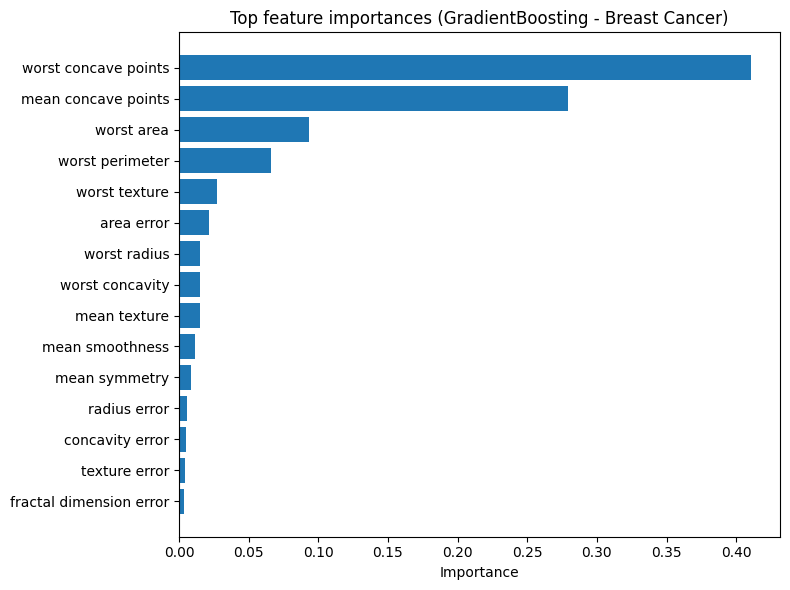

In [12]:
# 3) Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance
print("\n3) GradientBoostingClassifier (Breast Cancer) - accuracy + feature importances")
bc = load_breast_cancer()
Xbc, ybc = bc.data, bc.target
Xbc_train, Xbc_test, ybc_train, ybc_test = train_test_split(Xbc, ybc, test_size=0.2, random_state=0)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gbc.fit(Xbc_train, ybc_train)
ybc_pred = gbc.predict(Xbc_test)
acc_gbc = accuracy_score(ybc_test, ybc_pred)
feat_imp = gbc.feature_importances_
feat_df = pd.DataFrame({'feature': bc.feature_names, 'importance': feat_imp}).sort_values('importance', ascending=False)
print(f"GradientBoostingClassifier accuracy (breast cancer): {acc_gbc:.4f}")
print("Top 10 feature importances:")
print(feat_df.head(10).to_string(index=False))
results['GradientBoosting_BC_accuracy'] = acc_gbc
results['GradientBoosting_BC_feature_importances'] = feat_df

# visualize top feature importances
plt.figure(figsize=(8,6))
top_n = 15
topf = feat_df.head(top_n)[::-1]
plt.barh(topf['feature'], topf['importance'])
plt.title("Top feature importances (GradientBoosting - Breast Cancer)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [13]:
# 4) Gradient Boosting Regressor and evaluate using R-Squared Score
print("\n4) GradientBoostingRegressor (synthetic) - R^2")
Xgr, ygr = make_regression(n_samples=1000, n_features=15, noise=15.0, random_state=2)
Xgr_train, Xgr_test, ygr_train, ygr_test = train_test_split(Xgr, ygr, test_size=0.25, random_state=2)
gbr = GradientBoostingRegressor(n_estimators=150, learning_rate=0.05, max_depth=3, random_state=2)
gbr.fit(Xgr_train, ygr_train)
ygr_pred = gbr.predict(Xgr_test)
r2_gbr = r2_score(ygr_test, ygr_pred)
print(f"GradientBoostingRegressor R^2: {r2_gbr:.4f}")
results['GradientBoosting_Regressor_R2'] = r2_gbr


4) GradientBoostingRegressor (synthetic) - R^2
GradientBoostingRegressor R^2: 0.8758


In [14]:
# 5) XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
print("\n5) XGBoost Classifier (compare with sklearn GradientBoosting on same dataset)")
if HAS_XGBOOST:
    xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)
    xgb_clf.fit(X_train, y_train)
    y_xgb = xgb_clf.predict(X_test)
    acc_xgb = accuracy_score(y_test, y_xgb)
    print(f"XGBoost Classifier accuracy: {acc_xgb:.4f}")
    # compare with sklearn GradientBoosting on same data
    gbc_simple = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=RANDOM_STATE)
    gbc_simple.fit(X_train, y_train)
    y_gbc_simple = gbc_simple.predict(X_test)
    acc_gbc_simple = accuracy_score(y_test, y_gbc_simple)
    print(f"GradientBoostingClassifier (same data) accuracy: {acc_gbc_simple:.4f}")
    results['XGBoost_Classifier_accuracy'] = acc_xgb
    results['GradientBoosting_on_same_data_accuracy'] = acc_gbc_simple
else:
    print("Skipping XGBoost classifier: xgboost not available.")
    results['XGBoost_Classifier_accuracy'] = None


5) XGBoost Classifier (compare with sklearn GradientBoosting on same dataset)
XGBoost Classifier accuracy: 0.9200
GradientBoostingClassifier (same data) accuracy: 0.9040


In [15]:
# 6) CatBoost Classifier and evaluate using F1-Score
print("\n6) CatBoost Classifier - F1 Score")
if HAS_CATBOOST:
    # prepare a binary classification dataset
    Xc, yc = make_classification(n_samples=800, n_features=12, n_informative=6, random_state=10)
    Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.25, random_state=10)
    cat_clf = CatBoostClassifier(verbose=0, iterations=200, random_state=10)
    cat_clf.fit(Xc_train, yc_train)
    y_cat = cat_clf.predict(Xc_test)
    f1_cat = f1_score(yc_test, y_cat)
    print(f"CatBoost Classifier F1-score: {f1_cat:.4f}")
    results['CatBoost_F1'] = f1_cat
else:
    print("Skipping CatBoost: catboost not available.")
    results['CatBoost_F1'] = None


6) CatBoost Classifier - F1 Score
CatBoost Classifier F1-score: 0.8945


In [16]:
# 7) XGBoost Regressor and evaluate using Mean Squared Error (MSE)
print("\n7) XGBoost Regressor - MSE")
if HAS_XGBOOST:
    xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=3, n_jobs=-1)
    Xrr, yrr = make_regression(n_samples=700, n_features=10, noise=20.0, random_state=3)
    Xrr_train, Xrr_test, yrr_train, yrr_test = train_test_split(Xrr, yrr, test_size=0.2, random_state=3)
    xgb_reg.fit(Xrr_train, yrr_train)
    yrr_pred = xgb_reg.predict(Xrr_test)
    mse_xgb_reg = mean_squared_error(yrr_test, yrr_pred)
    print(f"XGBoost Regressor MSE: {mse_xgb_reg:.4f}")
    results['XGBoost_Regressor_MSE'] = mse_xgb_reg
else:
    print("Skipping XGBoost regressor: xgboost not available.")
    results['XGBoost_Regressor_MSE'] = None


7) XGBoost Regressor - MSE
XGBoost Regressor MSE: 5223.4562



8) AdaBoost feature importances (using tree base estimator)
Top AdaBoost features:
feature  importance
     f0    0.206242
     f7    0.126374
     f6    0.083411
    f12    0.078152
     f9    0.055891
    f19    0.053626
    f10    0.051897
     f3    0.051055
    f18    0.045046
    f17    0.044900


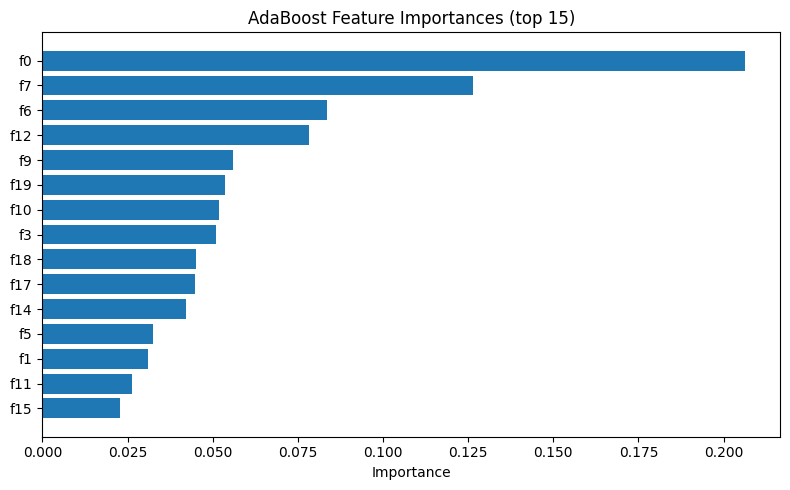

In [17]:
# 8) AdaBoost Classifier and visualize feature importance
print("\n8) AdaBoost feature importances (using tree base estimator)")
adb_clf_feat = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=200, random_state=7)
adb_clf_feat.fit(X_train, y_train)
if hasattr(adb_clf_feat, "feature_importances_"):
    adb_feat_imp = adb_clf_feat.feature_importances_
    adb_feat_df = pd.DataFrame({'feature': [f"f{i}" for i in range(X.shape[1])], 'importance': adb_feat_imp}).sort_values('importance', ascending=False)
    print("Top AdaBoost features:")
    print(adb_feat_df.head(10).to_string(index=False))
    # plot
    plt.figure(figsize=(8,5))
    topadb = adb_feat_df.head(15)[::-1]
    plt.barh(topadb['feature'], topadb['importance'])
    plt.title("AdaBoost Feature Importances (top 15)")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()
    results['AdaBoost_feature_importances'] = adb_feat_df
else:
    print("AdaBoost model does not expose feature_importances_.")
    results['AdaBoost_feature_importances'] = None


9) GradientBoostingRegressor - Learning curves (R^2)


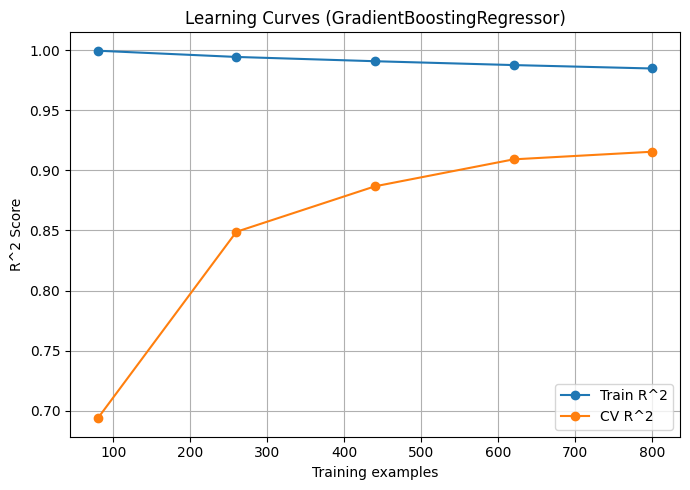

In [18]:
# 9) Gradient Boosting Regressor and plot learning curves
print("\n9) GradientBoostingRegressor - Learning curves (R^2)")
from sklearn.model_selection import ShuffleSplit
gbr_for_learning = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=4)
train_sizes, train_scores, test_scores = learning_curve(
    gbr_for_learning, Xgr, ygr, cv=5, train_sizes=np.linspace(0.1,1.0,5), scoring='r2', n_jobs=1, shuffle=True, random_state=RANDOM_STATE
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_scores_mean, marker='o', label='Train R^2')
plt.plot(train_sizes, test_scores_mean, marker='o', label='CV R^2')
plt.title("Learning Curves (GradientBoostingRegressor)")
plt.xlabel("Training examples")
plt.ylabel("R^2 Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


10) XGBoost feature importances (if available)
Top XGBoost features:
feature  importance
     f0    0.319650
    f10    0.097381
     f6    0.062550
     f7    0.062343
    f12    0.056912
    f18    0.046910
    f15    0.038973
     f3    0.037598
    f14    0.029152
     f4    0.027145


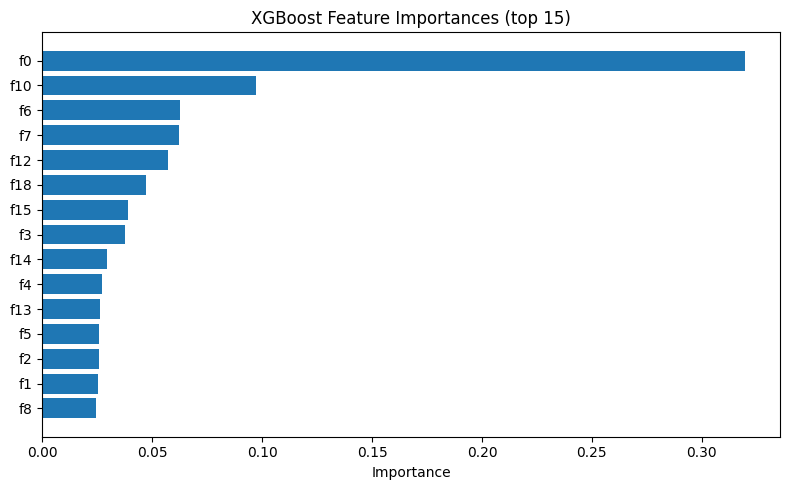

In [19]:
# 10) XGBoost Classifier and visualize feature importance
print("\n10) XGBoost feature importances (if available)")
if HAS_XGBOOST and 'xgb_clf' in globals():
    if hasattr(xgb_clf, "feature_importances_"):
        xgb_feat = xgb_clf.feature_importances_
        xgb_feat_df = pd.DataFrame({'feature': [f"f{i}" for i in range(X.shape[1])], 'importance': xgb_feat}).sort_values('importance', ascending=False)
        print("Top XGBoost features:")
        print(xgb_feat_df.head(10).to_string(index=False))
        plt.figure(figsize=(8,5))
        topx = xgb_feat_df.head(15)[::-1]
        plt.barh(topx['feature'], topx['importance'])
        plt.title("XGBoost Feature Importances (top 15)")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()
    else:
        print("XGBoost classifier doesn't expose feature_importances_ in this version.")
else:
    print("Skipping XGBoost feature importance: xgboost not available or model not trained.")


11) CatBoost confusion matrix (if available)


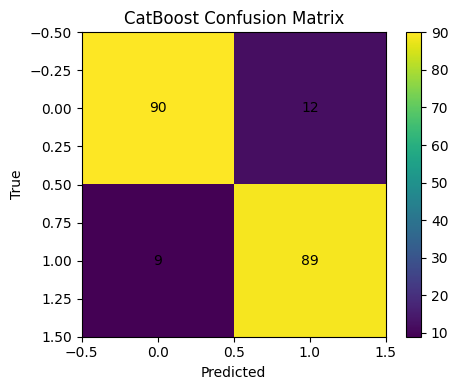

In [20]:
# 11) CatBoost Classifier and plot the confusion matrix
print("\n11) CatBoost confusion matrix (if available)")
if HAS_CATBOOST and 'cat_clf' in globals():
    cm = confusion_matrix(yc_test, y_cat)
    plot_confusion_matrix(cm, title="CatBoost Confusion Matrix")
else:
    print("Skipping CatBoost confusion matrix: catboost not available or model not trained.")


12) AdaBoost: accuracy vs n_estimators
 n_estimators  accuracy
           10     0.828
           50     0.856
          100     0.848
          200     0.852


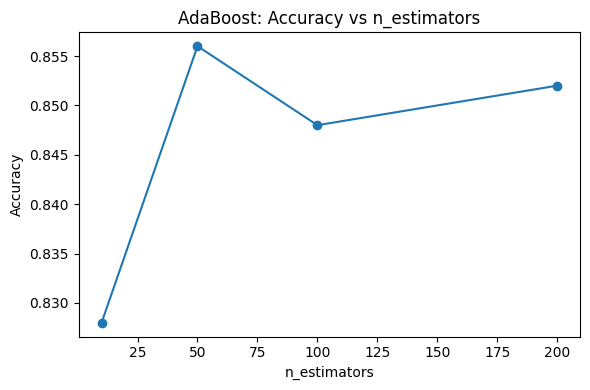

In [21]:
# 12) AdaBoost Classifier with different numbers of estimators and compare accuracy
print("\n12) AdaBoost: accuracy vs n_estimators")
estimators_list = [10, 50, 100, 200]
adb_accs = []
for n in estimators_list:
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n, random_state=0)
    model.fit(X_train, y_train)
    adb_accs.append(accuracy_score(y_test, model.predict(X_test)))
acc_df = pd.DataFrame({'n_estimators': estimators_list, 'accuracy': adb_accs})
print(acc_df.to_string(index=False))
plt.figure(figsize=(6,4))
plt.plot(estimators_list, adb_accs, marker='o')
plt.title("AdaBoost: Accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()
results['AdaBoost_n_estimators_results'] = acc_df


13) GradientBoostingClassifier ROC curve (Breast Cancer)


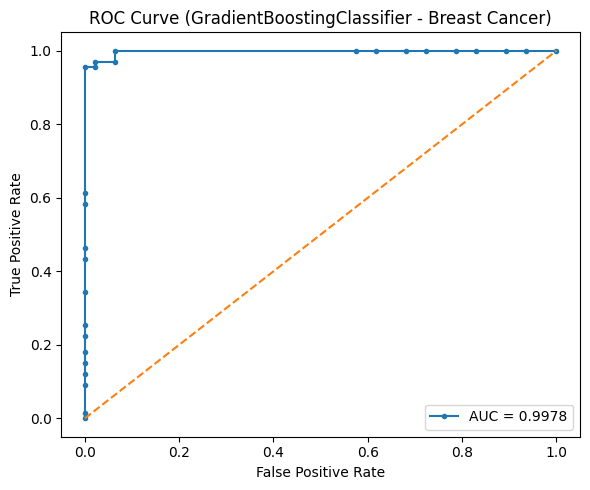

GradientBoostingClassifier AUC: 0.9978


In [22]:
# 13) Gradient Boosting Classifier and visualize the ROC curve
print("\n13) GradientBoostingClassifier ROC curve (Breast Cancer)")
if hasattr(gbc, "predict_proba"):
    y_score = gbc.predict_proba(Xbc_test)[:,1]
    fpr, tpr, _ = roc_curve(ybc_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, marker='.', label=f"AUC = {roc_auc:.4f}")
    plt.plot([0,1],[0,1],'--')
    plt.title("ROC Curve (GradientBoostingClassifier - Breast Cancer)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()
    print(f"GradientBoostingClassifier AUC: {roc_auc:.4f}")
    results['GradientBoosting_BC_AUC'] = roc_auc
else:
    print("Model does not support predict_proba to build ROC curve.")

In [23]:
# 14) XGBoost Regressor and tune the learning rate using GridSearchCV
print("\n14) XGBoost Regressor - GridSearchCV tune learning_rate (if available)")
if HAS_XGBOOST:
    param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
    grid = GridSearchCV(xgb.XGBRegressor(n_estimators=100, random_state=5, n_jobs=-1), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=1)
    grid.fit(Xrr_train, yrr_train)
    print("Best params (XGBoost Regressor):", grid.best_params_, "best score (neg MSE):", grid.best_score_)
    results['XGBoost_Regressor_GridSearch_best'] = grid.best_params_
else:
    print("Skipping GridSearch: xgboost not available.")


14) XGBoost Regressor - GridSearchCV tune learning_rate (if available)
Best params (XGBoost Regressor): {'learning_rate': 0.1} best score (neg MSE): -6241.709764646923


In [24]:
# 15) CatBoost Classifier on an imbalanced dataset and compare performance with class weighting
print("\n15) CatBoost on imbalanced dataset - compare default vs class_weights (if available)")
if HAS_CATBOOST:
    Ximb, yimb = make_classification(n_samples=1200, n_features=12, weights=[0.9, 0.1], flip_y=0.01, random_state=11)
    Ximb_train, Ximb_test, yimb_train, yimb_test = train_test_split(Ximb, yimb, test_size=0.25, random_state=11)
    cat_default = CatBoostClassifier(verbose=0, iterations=200, random_state=11)
    cat_default.fit(Ximb_train, yimb_train)
    y_def = cat_default.predict(Ximb_test)
    f1_def = f1_score(yimb_test, y_def)
    class_weights = [1.0, 9.0]  # heavier weight to minority
    cat_weighted = CatBoostClassifier(verbose=0, iterations=200, random_state=11, class_weights=class_weights)
    cat_weighted.fit(Ximb_train, yimb_train)
    y_w = cat_weighted.predict(Ximb_test)
    f1_w = f1_score(yimb_test, y_w)
    print(f"CatBoost F1 (default): {f1_def:.4f} , with class_weights: {f1_w:.4f}")
    results['CatBoost_imbalanced_default_f1'] = f1_def
    results['CatBoost_imbalanced_weighted_f1'] = f1_w
else:
    print("Skipping CatBoost imbalanced comparison: catboost not available.")


15) CatBoost on imbalanced dataset - compare default vs class_weights (if available)
CatBoost F1 (default): 0.9091 , with class_weights: 0.9118



16) AdaBoost: effect of different learning rates
 learning_rate  accuracy
          0.01     0.824
          0.05     0.824
          0.10     0.820
          0.50     0.852
          1.00     0.848


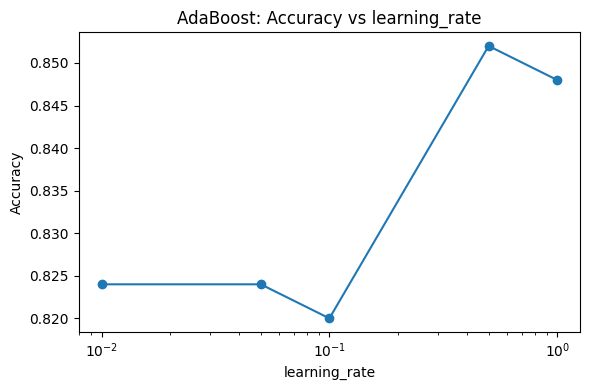

In [25]:
# 16) AdaBoost Classifier and analyze the effect of different learning rates
print("\n16) AdaBoost: effect of different learning rates")
lr_list = [0.01, 0.05, 0.1, 0.5, 1.0]
adb_lr_acc = []
for lr in lr_list:
    m = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), learning_rate=lr, n_estimators=100, random_state=2)
    m.fit(X_train, y_train)
    adb_lr_acc.append(accuracy_score(y_test, m.predict(X_test)))
acc_lr_df = pd.DataFrame({'learning_rate': lr_list, 'accuracy': adb_lr_acc})
print(acc_lr_df.to_string(index=False))
plt.figure(figsize=(6,4))
plt.plot(lr_list, adb_lr_acc, marker='o')
plt.title("AdaBoost: Accuracy vs learning_rate")
plt.xlabel("learning_rate")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()
results['AdaBoost_learning_rate_effects'] = acc_lr_df

In [26]:
# 17) XGBoost Classifier for multi-class classification and evaluate using log-loss
print("\n17) XGBoost multi-class classification - log-loss (if available)")
if HAS_XGBOOST:
    Xm, ym = make_classification(n_samples=1200, n_features=15, n_informative=8, n_classes=3, n_clusters_per_class=1, random_state=20)
    Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.25, random_state=20)
    xgb_multi = xgb.XGBClassifier(objective='multi:softprob', num_class=3, n_estimators=150, use_label_encoder=False, eval_metric='mlogloss', random_state=20, n_jobs=-1)
    xgb_multi.fit(Xm_train, ym_train)
    prob_multi = xgb_multi.predict_proba(Xm_test)
    logloss_multi = log_loss(ym_test, prob_multi)
    print(f"XGBoost multi-class log-loss: {logloss_multi:.4f}")
    results['XGBoost_multiclass_logloss'] = logloss_multi
else:
    print("Skipping XGBoost multiclass: xgboost not available.")


17) XGBoost multi-class classification - log-loss (if available)
XGBoost multi-class log-loss: 0.4059
